In [1]:
%run -i classes_lkl_prof_functions.ipynb

In [2]:
ede = lkl_prof('/home2/karwal/mcmc_chains/ede_lkl_profile/scf_3p_base/', 
               'scf_f_z_scf1_cmb_bao_sne_', 
               'f_axion_ac', 
               mcmc_chain_settings={'ignore_rows' : 0.5}
              )

ede.prof_incr = 0.01
ede.prof_max = 0.15
ede.prof_min = 0.005
ede.processes = 2

In [3]:
ede.mcmc()

Chains converged sufficiently. Current R-1 = 0.042 satisfies R-1 wanted = 0.050. 
Move on to checking minimum.


True

In [4]:
ede.global_min();

check_global_min: Found previously run MCMC chains and global minimizer. 
match_param_names: Found existing file with correct name and parameters / parameter sequence. Will append to it. 
/home2/karwal/mcmc_chains/ede_lkl_profile/scf_3p_base/scf_f_z_scf1_cmb_bao_sne__p_lkl_profile.txt


In [5]:
ede.init_lkl_prof();

In [6]:
ede.run_lkl_prof(time_mins = True)

0.156753689

## Analysis functions 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
chis = ede.sum_params(['chi2__CMB', 'chi2__SN', 'chi2__BAO'])
lkl_prof_param = ede.full_lkl_prof_dict()[ede.prof_param]

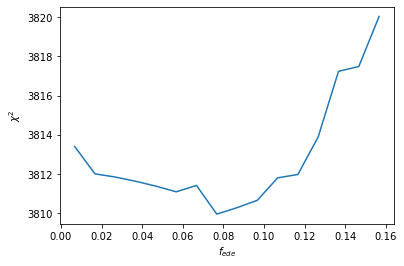

In [9]:
plt.plot( lkl_prof_param , chis )
plt.ylabel(r'$\chi^2$')
# plt.xlabel(r'$'+lkl_pro_yaml['params'][ede.prof_param]['latex']+'$')
plt.xlabel(r'$f_{ede}$')
plt.show()

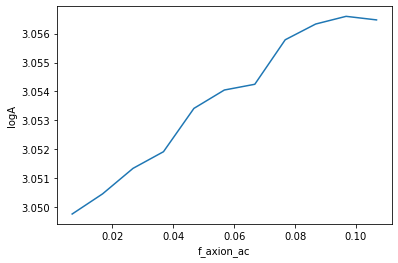

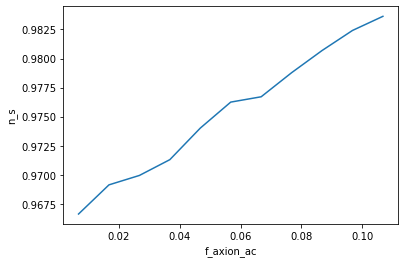

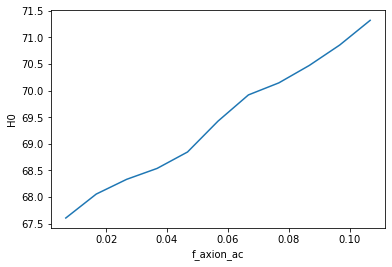

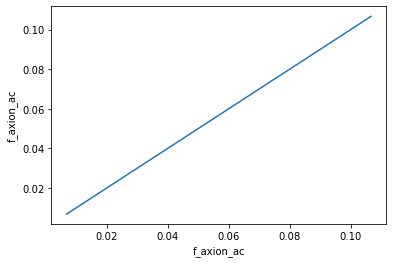

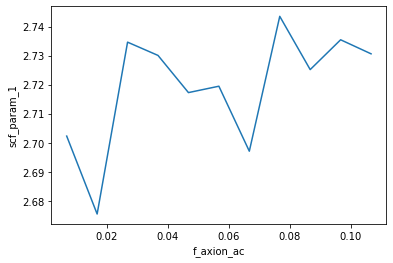

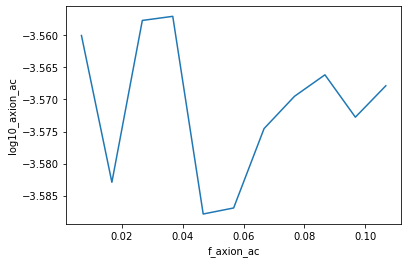

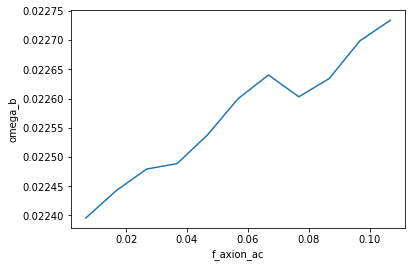

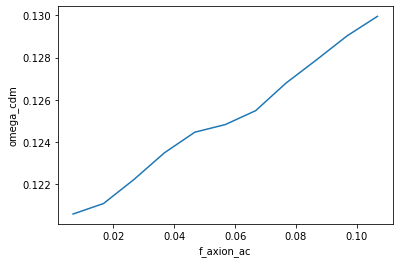

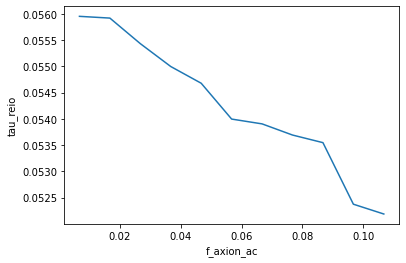

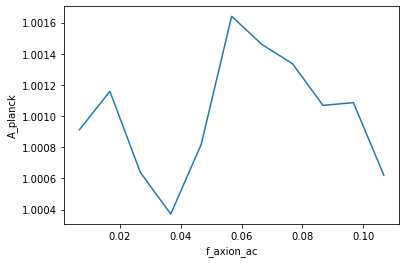

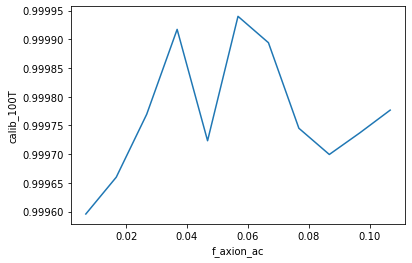

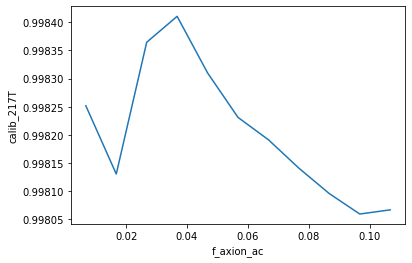

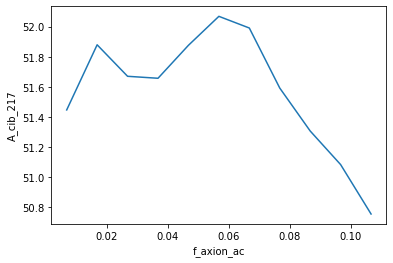

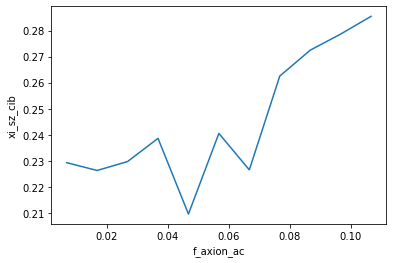

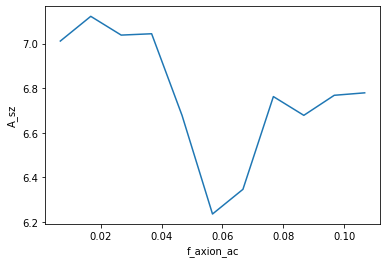

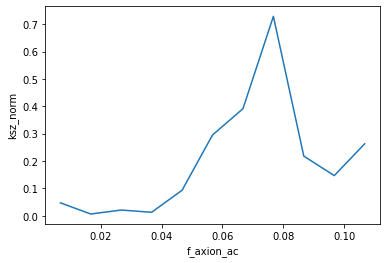

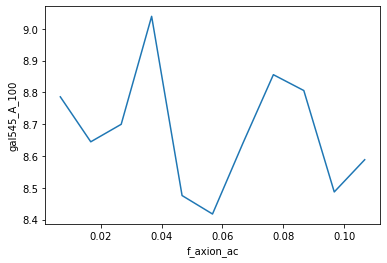

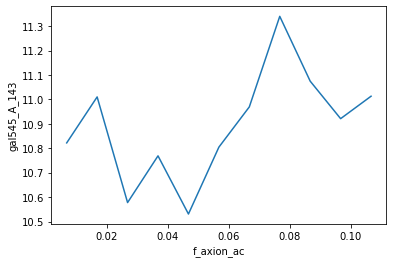

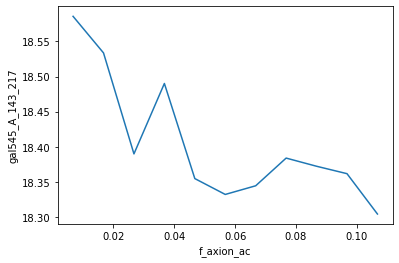

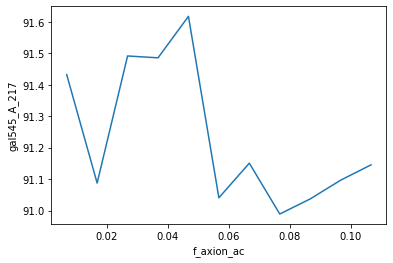

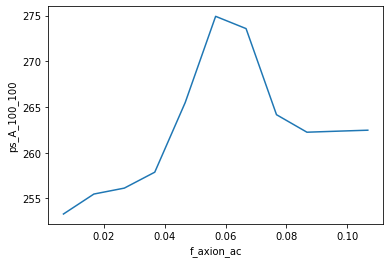

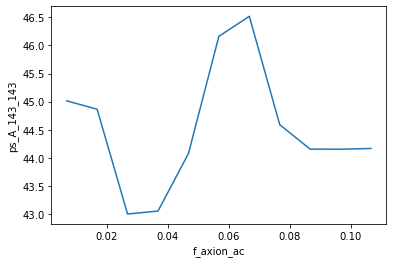

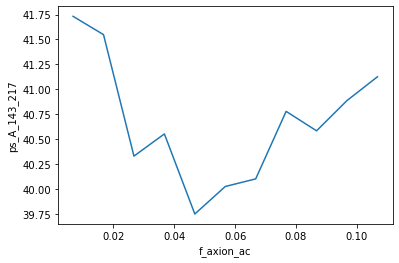

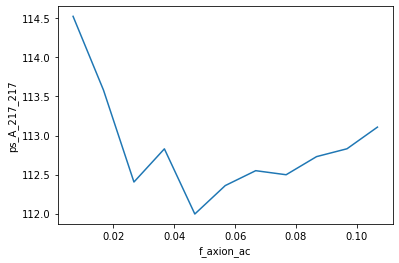

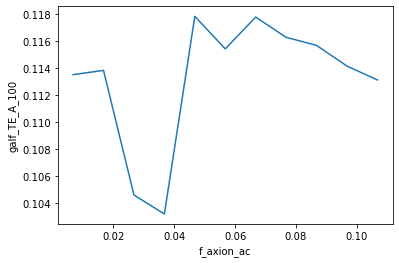

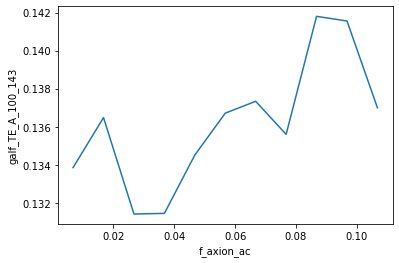

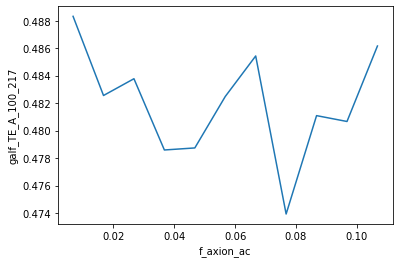

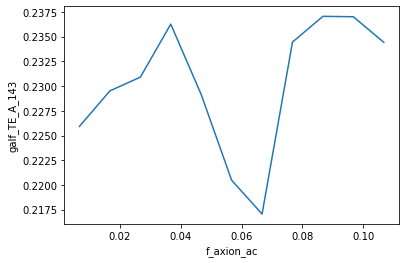

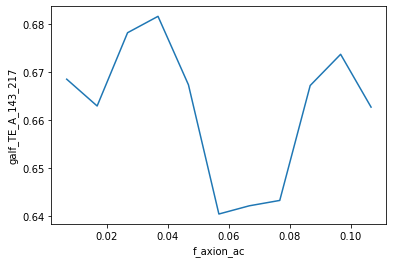

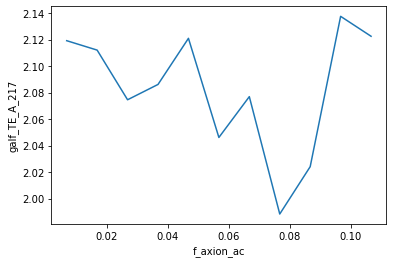

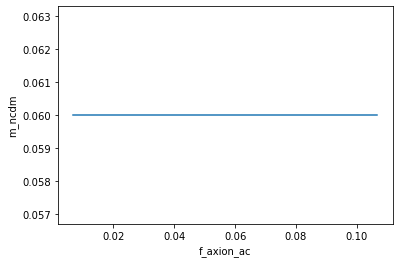

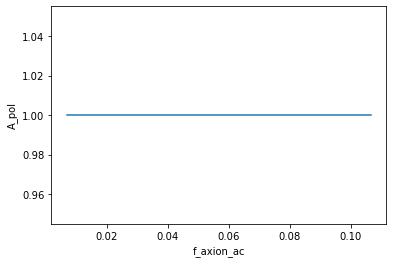

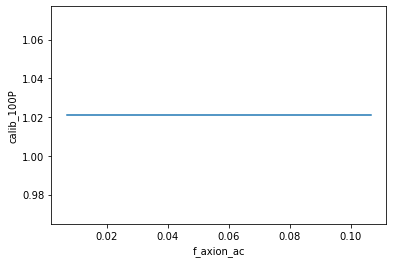

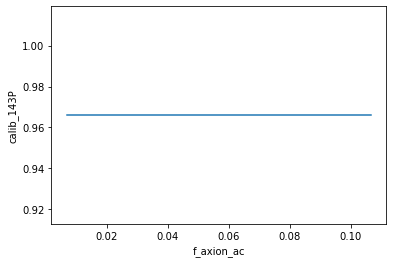

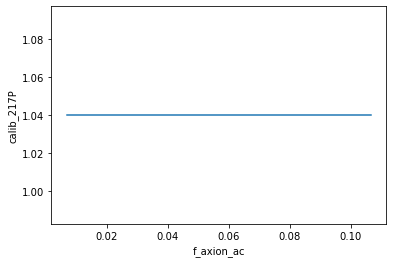

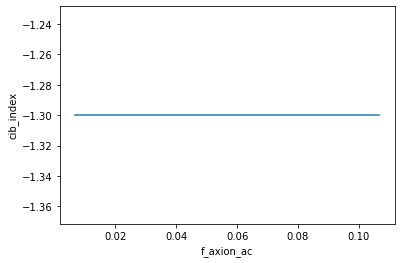

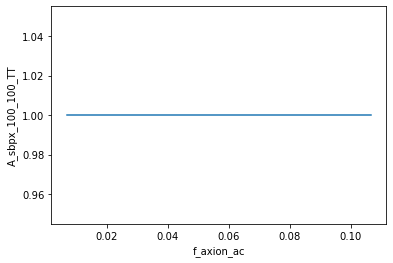

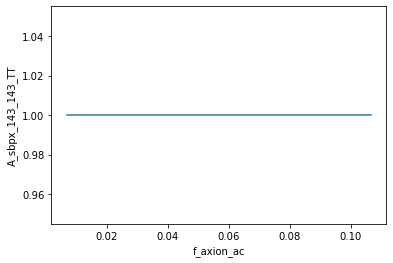

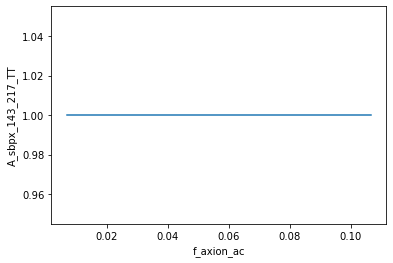

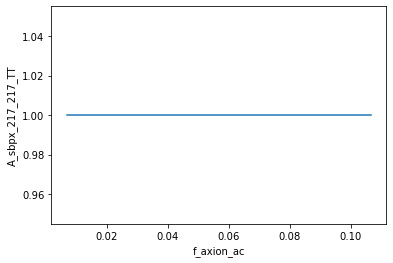

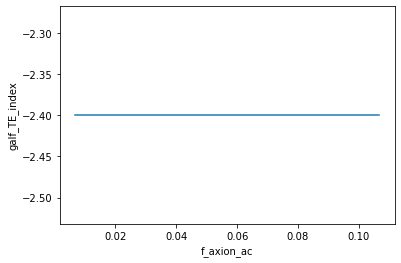

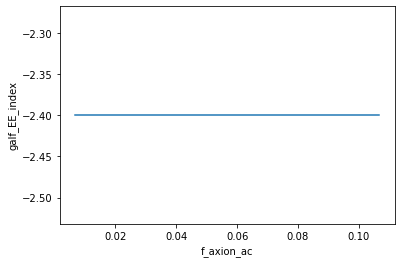

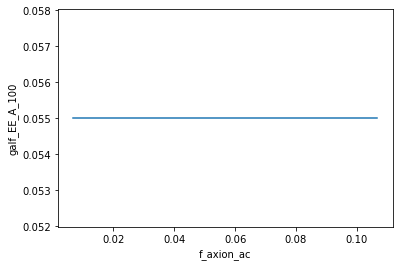

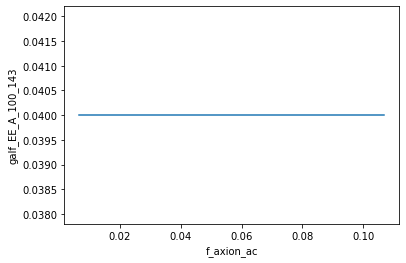

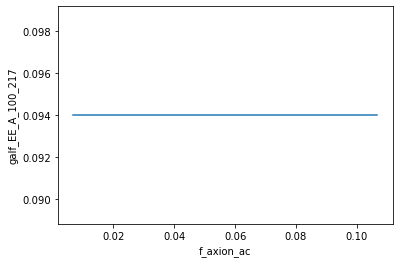

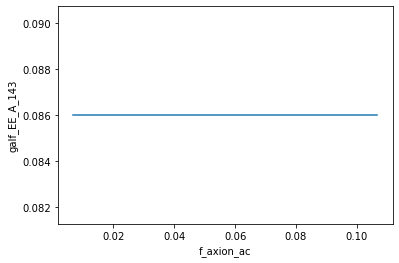

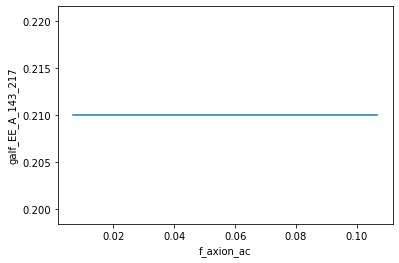

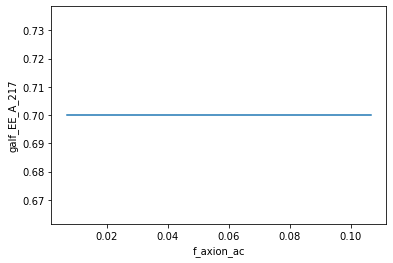

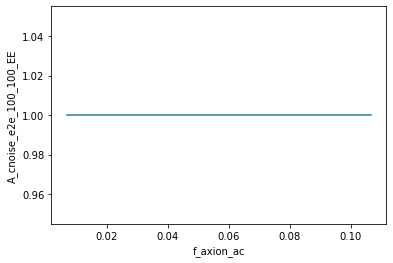

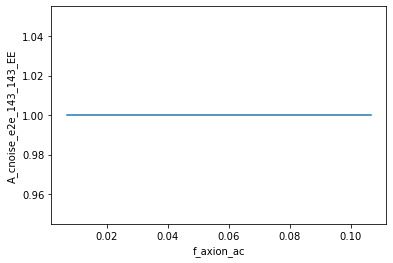

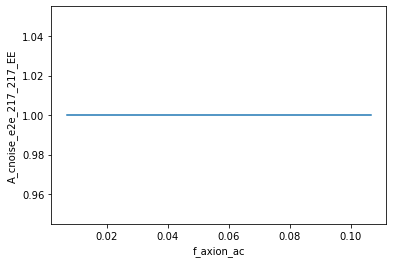

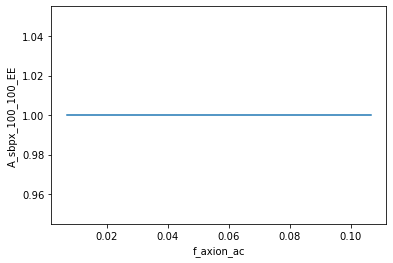

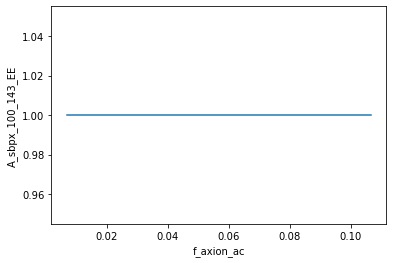

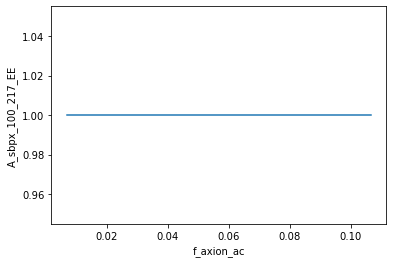

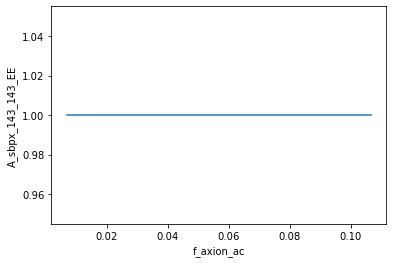

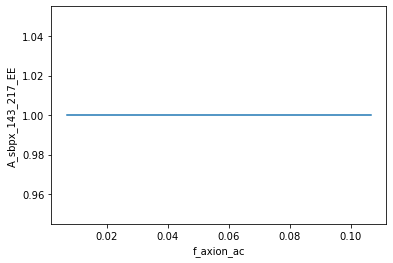

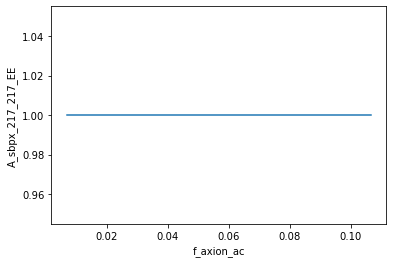

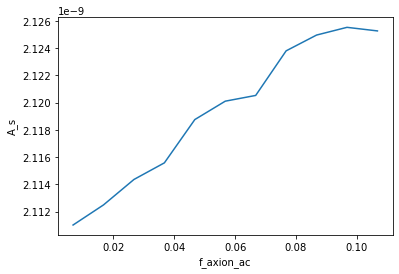

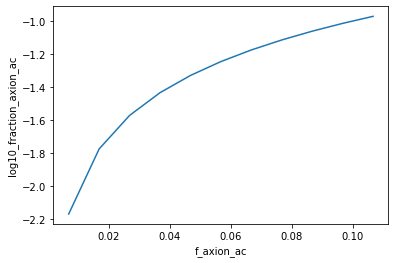

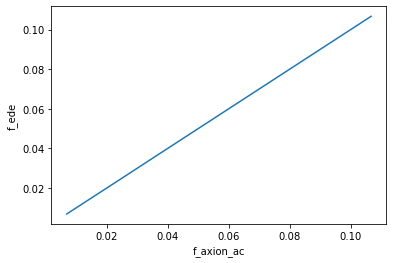

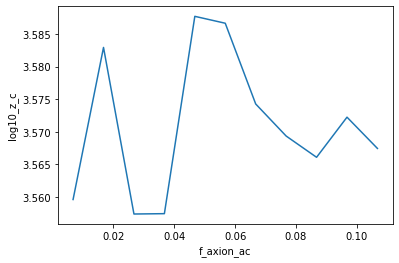

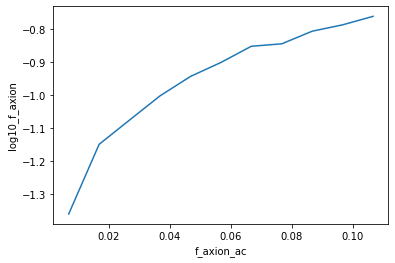

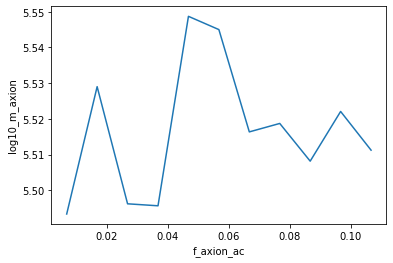

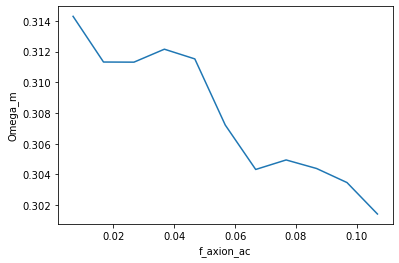

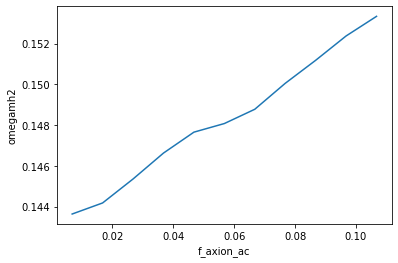

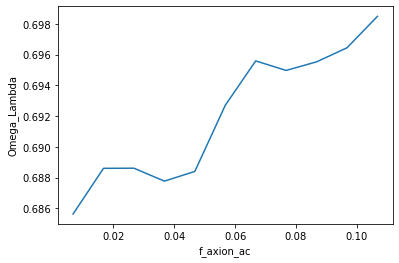

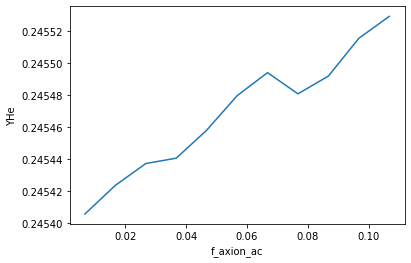

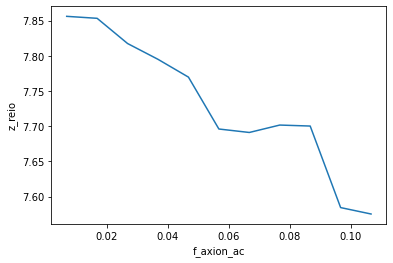

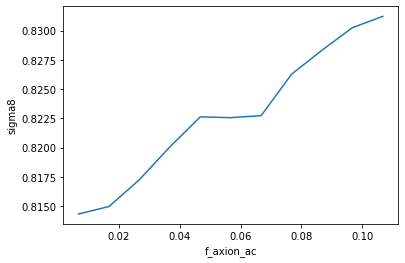

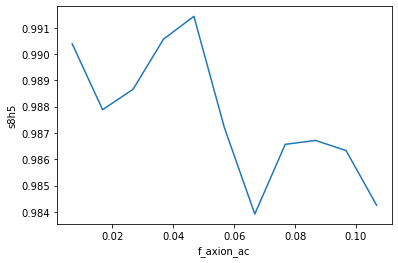

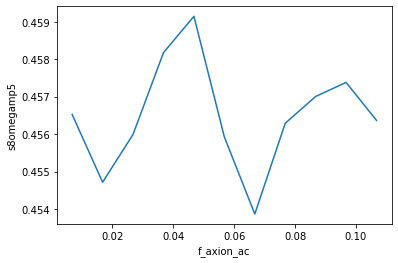

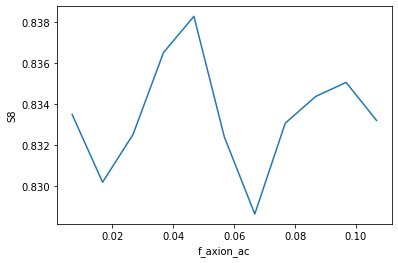

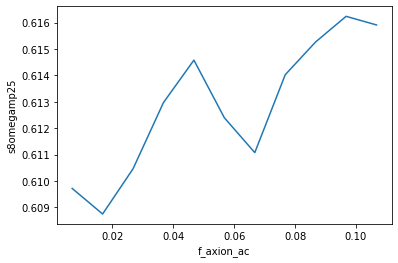

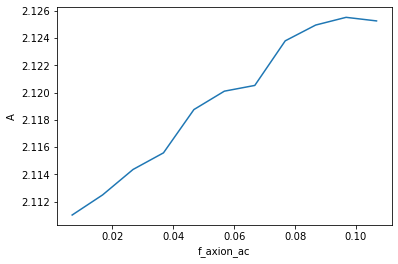

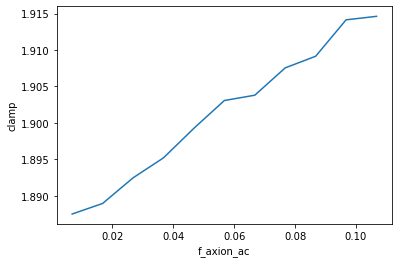

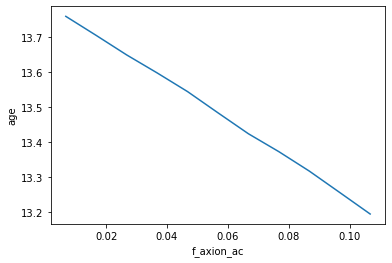

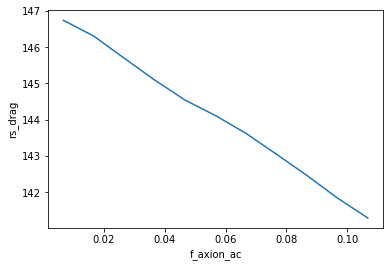

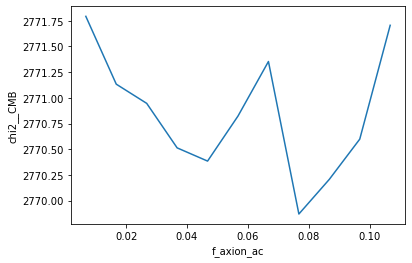

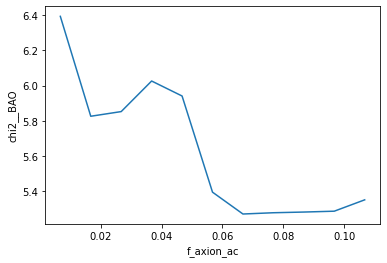

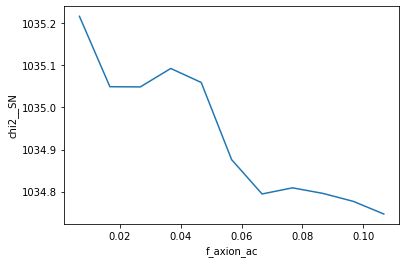

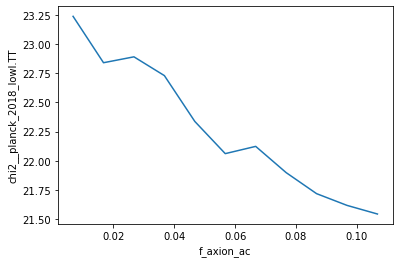

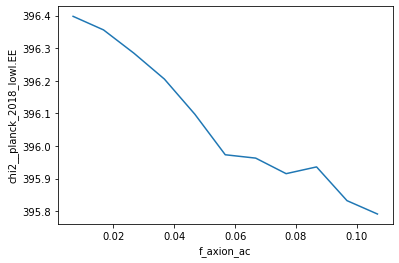

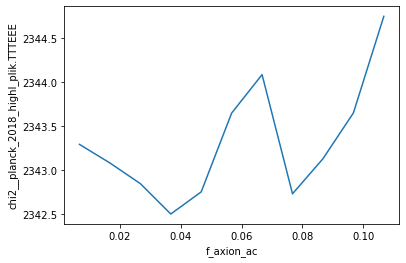

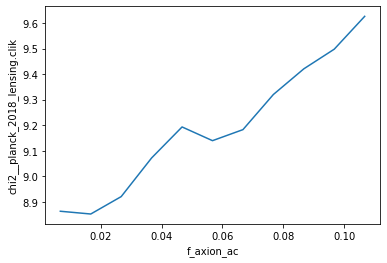

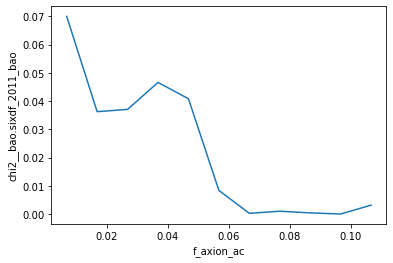

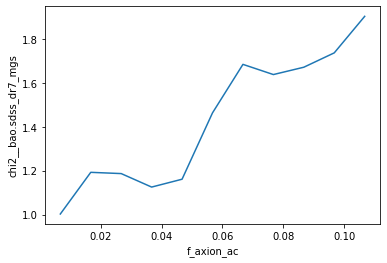

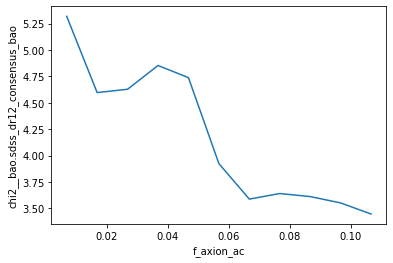

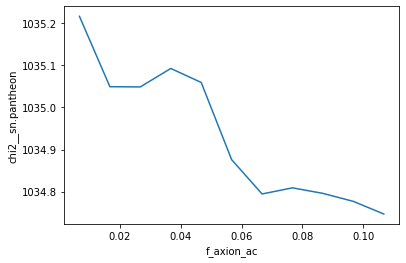

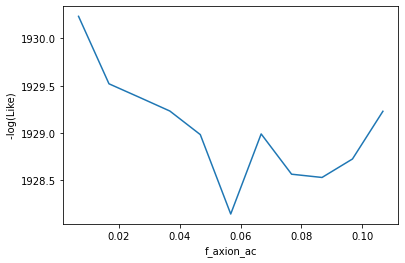

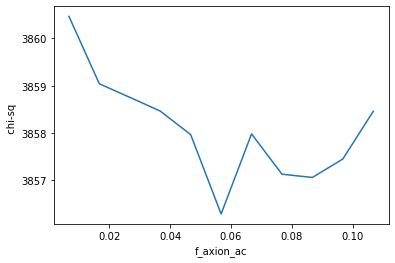

In [12]:
prof_lkl_output = ede.full_lkl_prof_dict()

for param in ede.param_order:
    plt.plot( prof_lkl_output[ede.prof_param], prof_lkl_output[param] )
#     try:
#         plt.ylabel(r'$'+lkl_pro_yaml['params'][param]['latex']+'$')
#     except KeyError:
#         plt.ylabel([param])
#     plt.xlabel(r'$'+lkl_pro_yaml['params'][ede.prof_param]['latex']+'$')
    plt.ylabel(param)
    plt.xlabel(ede.prof_param)
    plt.show()